### Biomechanical features of orthope

The categories Disk Hernia and Spondylolisthesis were merged into a single category labelled as 'abnormal'. Thus, the task consists in classifying patients as belonging to one out of two categories: Normal (100 patients) or Abnormal (210 patients).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import graphviz 
from sklearn.tree import export_graphviz

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('column_2C_weka.csv' )

# não tem null
percen_faltantes = round((df.isnull().sum() / len(df['class']) )*100, 2)
percen_faltantes

pelvic_incidence            0.0
pelvic_tilt numeric         0.0
lumbar_lordosis_angle       0.0
sacral_slope                0.0
pelvic_radius               0.0
degree_spondylolisthesis    0.0
class                       0.0
dtype: float64

In [4]:
df['class'] = df['class'].map({'Normal': 0, 'Abnormal': 1})
x_ab = df.drop(['class'], axis='columns')
y_ab = df['class']

df['class'].value_counts() # não balanceada

class
1    210
0    100
Name: count, dtype: int64

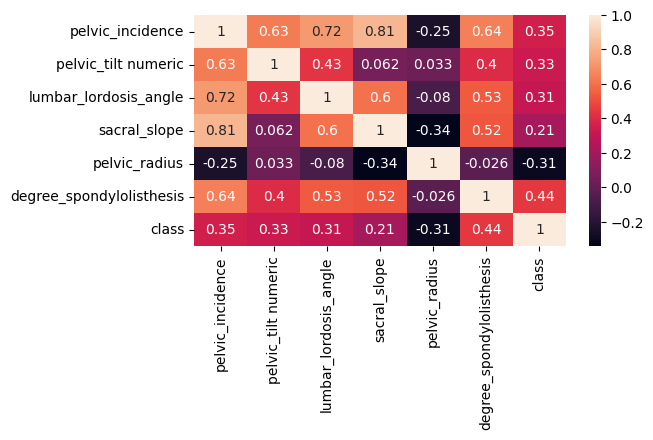

In [5]:
# Pelvict tilt e cacral slope tem alta correlação
plt.figure(figsize = (6,3))
sns.heatmap(df.corr(method = 'pearson', numeric_only=True), annot=True)
plt.show()

In [6]:
# parametros
parametros_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [3,4,5,6],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8]
    ##'min_samples_leaf': [1, 2, 3]
}

modelo = DecisionTreeClassifier(random_state = 10)

gridDecisionTree = GridSearchCV(estimator= modelo, param_grid= parametros_grid, cv = 5, scoring=  'accuracy')
gridDecisionTree.fit(x_ab, y_ab)

#Imprimindo melhores parâmetros
print("Mínimo Split:", gridDecisionTree.best_estimator_.min_samples_split)
print("Máxima Profundidade:",gridDecisionTree.best_estimator_.max_features_)
print("Algoritmo Escolhido:",gridDecisionTree.best_estimator_.criterion)
print("Acurácia:",gridDecisionTree.best_score_)


Mínimo Split: 5
Máxima Profundidade: 6
Algoritmo Escolhido: entropy
Acurácia: 0.7709677419354838


In [52]:
melhor_modelo = DecisionTreeClassifier(min_samples_split= 5, max_depth=6, criterion='entropy')
melhor_modelo.fit(x_ab,y_ab)

export_graphviz(melhor_modelo, out_file='exemplo3.dot', feature_names= x_ab.columns)
with open('exemplo3.dot') as aberto:
    grafico_dot = aberto.read()
h = graphviz.Source(grafico_dot)
h.view()

'Source.gv.pdf'

## Scoring

Durante a avaliação de modelos de machine learning, é possível métricas de scoring para determinar o quão bem o modelo está performando em tarefas específicas, como classificação. Ao calcular essas métricas, você pode obter uma compreensão mais completa do desempenho do modelo em comparação com a simples acurácia, especialmente em casos de desbalanceamento de classes.

### F1-score

O F1-score é uma métrica que considera tanto a precisão quanto o recall. É especialmente útil quando há um desequilíbrio entre as classes.

A fórmula do F1-score é dada por:

$$ F1 = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}} $$

onde:
- Precisão é a proporção de verdadeiros positivos em relação ao total de instâncias **previstas** como positivas. Se a precisão for alta, significa que o modelo faz poucos falsos positivos.
- Recall é a proporção de verdadeiros positivos em relação ao total de instâncias **realmente** positivas. Se o recall for alto, significa que o modelo captura a maioria das instâncias positivas.

A métrica varia de 0 a 1, onde 1 representa o desempenho perfeito do modelo (precisão e recall ideais) e 0 representa o pior desempenho possível.